# Data Visualizations

### Import data and packages  

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from ipywidgets import interact, fixed

import pyarrow.parquet as pq

In [10]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (25, 25)

In [3]:
table = pq.read_table('Data/cleaned_data.parquet')
#Convert to pandas
data = table.to_pandas()

In [4]:
data.head()

,Date,Facility,Payer,SpecificService,CategoryofService,Sex,UniqueID,Age,Age_Group
0,2017,HCIS,ADSE,SERVIÇOS ESPECIAIS CARDIOLOGIA,EXAMES ESPECIAIS,Feminino,91e9d2627cd4cc24958988333c4220a3,37.0,YoungAdult
1,2017,CCSJM,PARTICULARES,SERVIÇOS E TÉCNICAS GERAIS,EXAMES ESPECIAIS,Feminino,91e9d2627cd4cc24958988333c4220a3,37.0,YoungAdult
2,2017,CCSJM,PARTICULARES,SERVIÇOS E TÉCNICAS GERAIS,SERVIÇOS E TÉCNICAS GERAIS,Feminino,91e9d2627cd4cc24958988333c4220a3,37.0,YoungAdult
3,2017,CCTV,ADSE,SERVIÇOS ESPECIAIS UROLOGIA,EXAMES ESPECIAIS,Feminino,91e9d2627cd4cc24958988333c4220a3,37.0,YoungAdult
4,2017,CCSJM,PARTICULARES,SERVIÇOS ESPECIAIS CARDIOLOGIA,EXAMES ESPECIAIS,Feminino,91e9d2627cd4cc24958988333c4220a3,37.0,YoungAdult


## Boxplots

### Age with a Categorical Variable

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

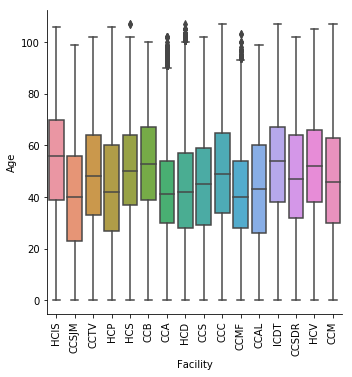

In [8]:
sns.catplot(x="Facility", y="Age", kind="box", data=data);
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

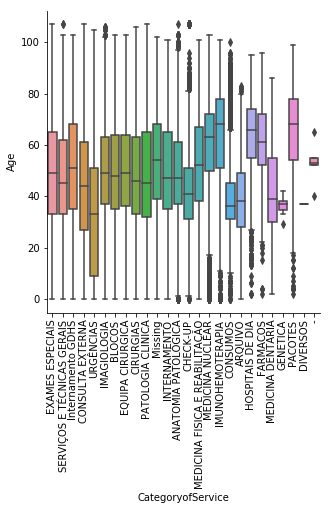

In [11]:
sns.catplot(x="CategoryofService", y="Age", kind="box", data=data);
plt.xticks(rotation=90)

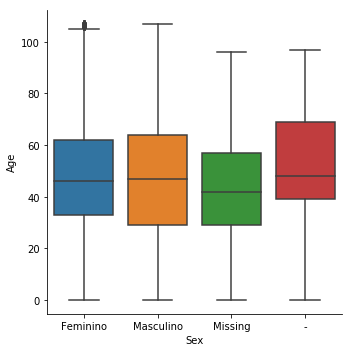

In [12]:
sns.catplot(x="Sex", y="Age", kind="box", data=data);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

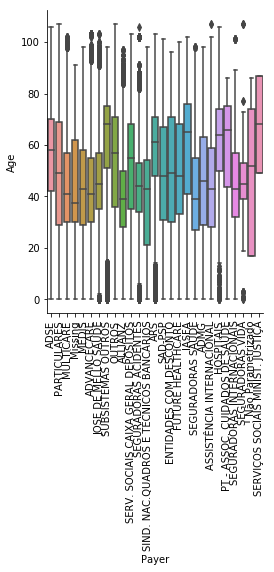

In [13]:
sns.catplot(x="Payer", y="Age", kind="box", data=data);
plt.xticks(rotation=90)

## Violin Plots

ValueError: There must be exactly two hue levels to use `split`.'

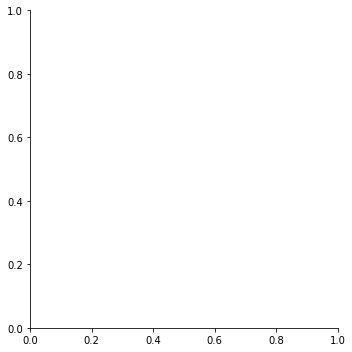

In [14]:
sns.catplot(x="CategoryofService", y="Age", hue="Sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=data);
plt.xticks(rotation=90)

## Histograms and Barplots

### Histogram of average age grouped by a categorical variable

In [15]:
# Average age for each sex
Sex_by_Age = data.groupby("Sex")["Age"].mean()
Sex_by_Age.head()

Sex
-            51.885556
Feminino     46.297106
Masculino    45.384972
Missing      41.791992
Name: Age, dtype: float64

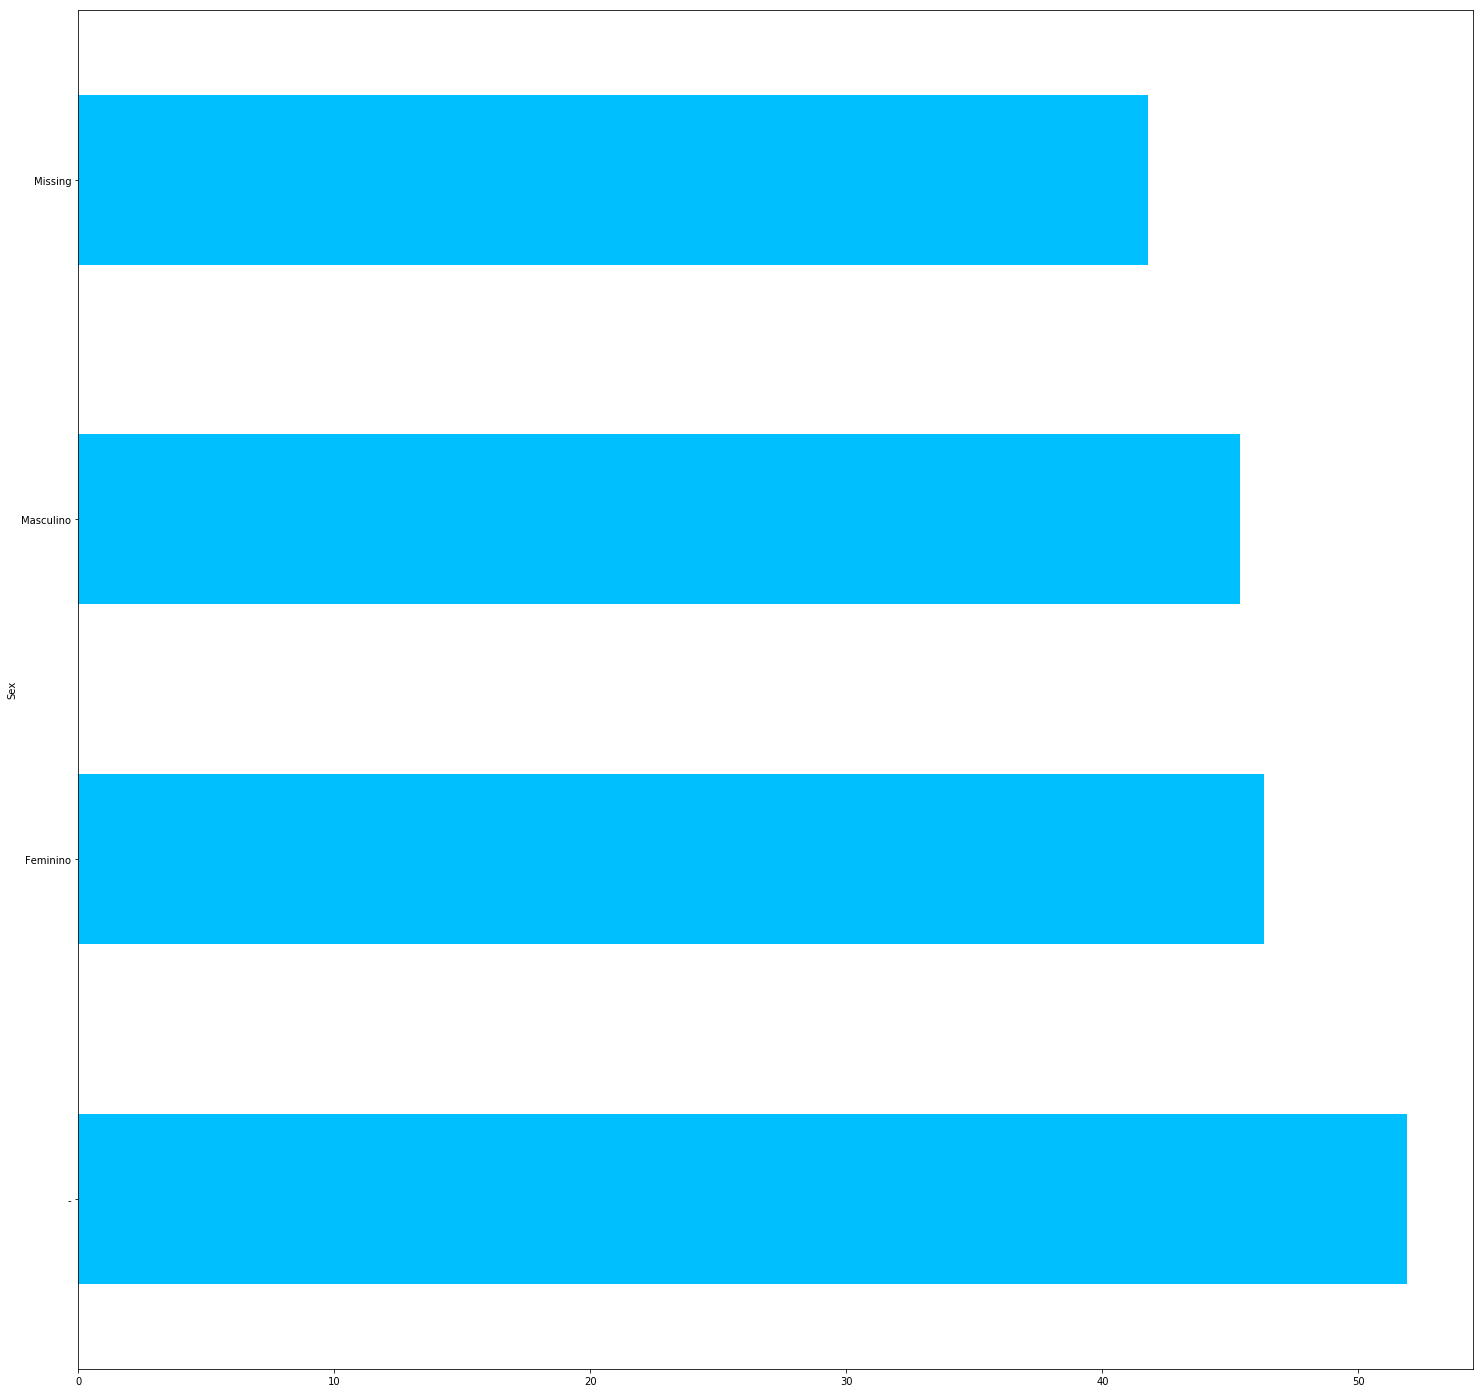

In [16]:
Sex_by_Age.plot.barh(color="deepskyblue");

In [18]:
# Average age for each category of service
CategoryofService_by_Age = data.groupby("CategoryofService")["Age"].mean()
CategoryofService_by_Age.head()

CategoryofService
-                      53.000000
ANATOMIA PATOLÓGICA    48.625568
ARQUIVO                40.437276
BLOCOS                 48.106029
CHECK-UP               41.162550
Name: Age, dtype: float64

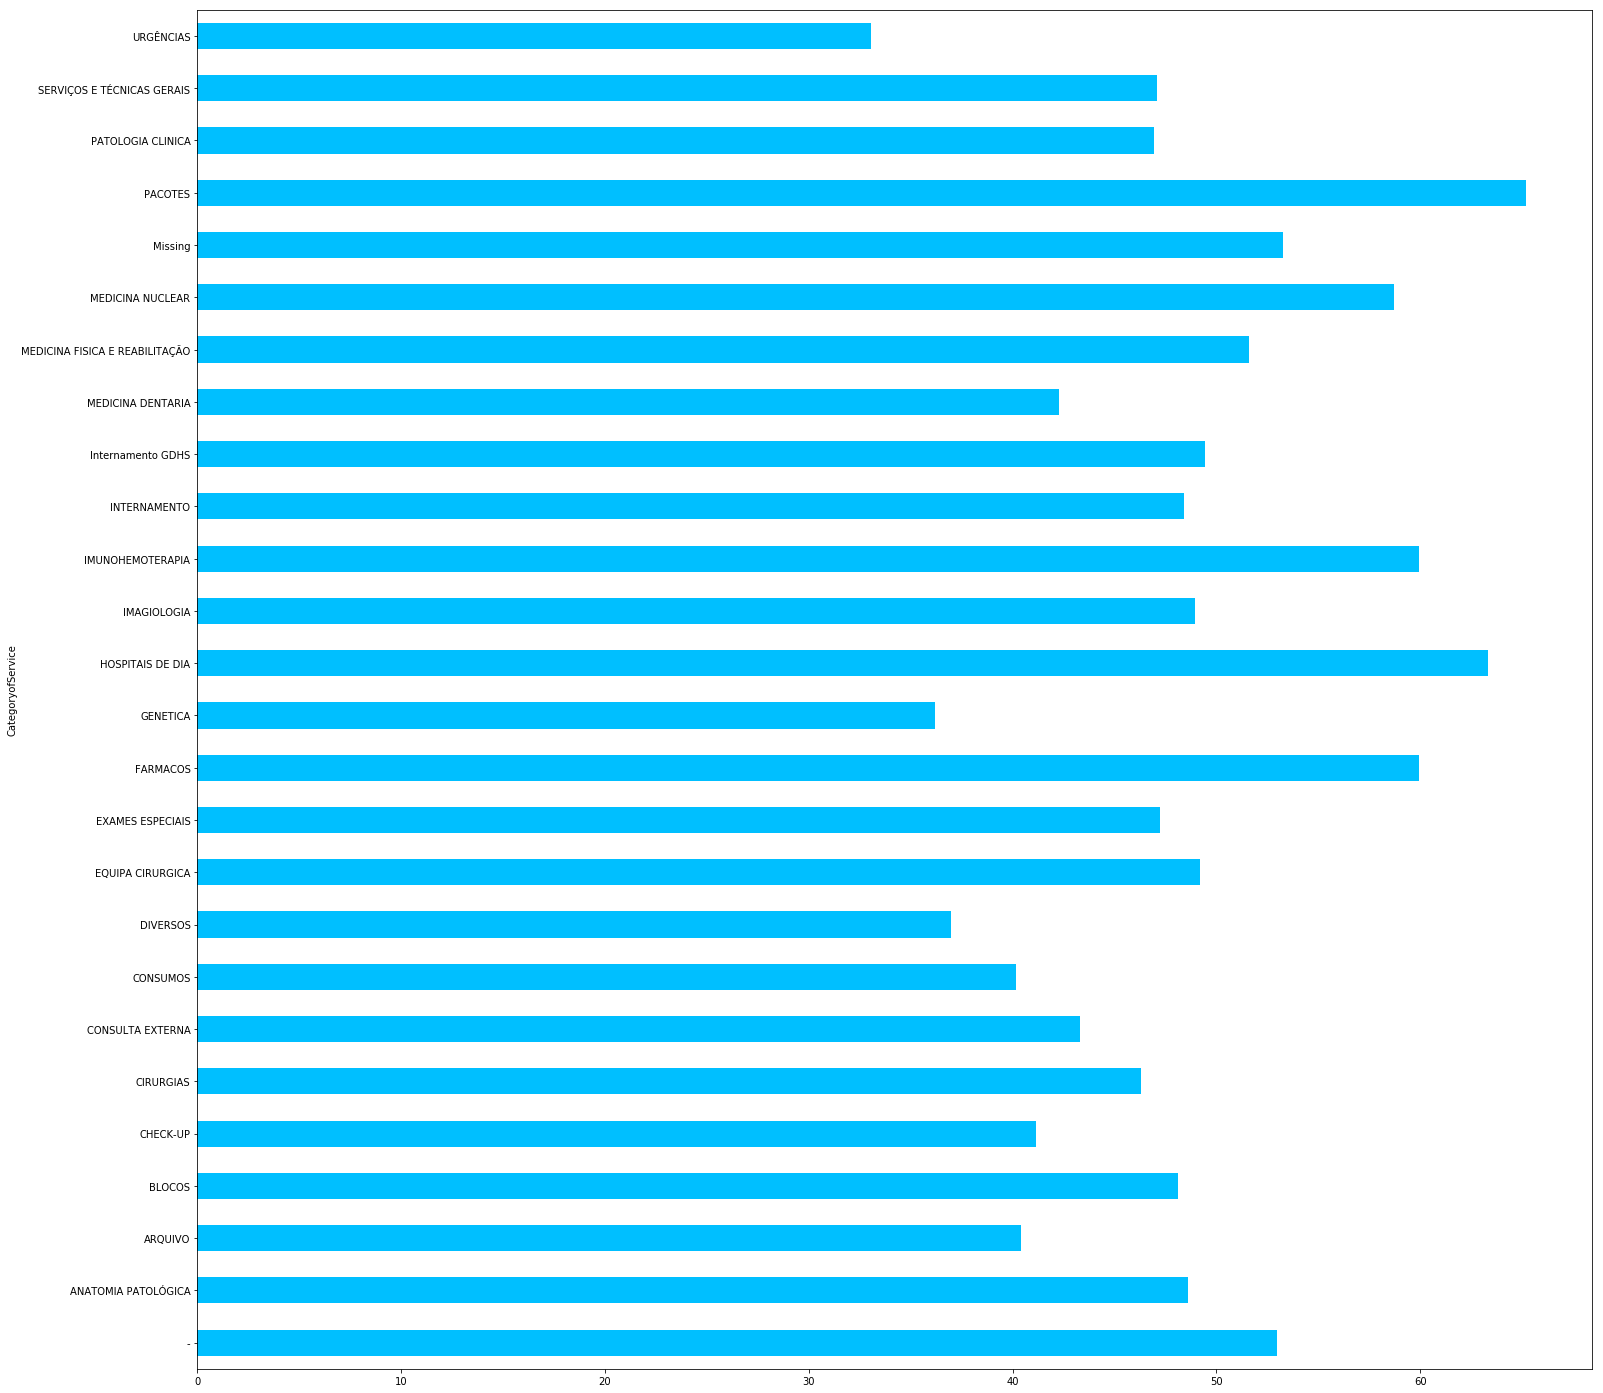

In [19]:
CategoryofService_by_Age.plot.barh(color="deepskyblue");

In [89]:
# Average age for each specific service
Service_by_Age = data.groupby("SpecificService")["Age"].mean()
Service_by_Age

SpecificService
ANESTESIA                               42.000000
BLOCO CIRURGIA AMBULATÓRIO              63.000000
BLOCO DE PARTOS                         63.000000
BLOCO OPERATORIO CENTRAL                33.000000
CARDIOLOGIA                             61.333333
CIRURGIA TORÁCICA                       73.000000
DIÁRIAS                                 67.000000
ECOGRAFIA                               33.000000
ENDOCRINOLOGIA                          42.000000
ENDOSCOPIA                              42.000000
GASTROENTEROLOGIA                       70.000000
Internamento GDHS                       42.000000
MEDICINA GERAL E FAMILIAR               47.000000
NEURO-CIRURGIA                          36.000000
OFTALMOLOGIA                            13.000000
PATOLOGIA CLINICA                       68.000000
PNEUMOLOGIA                             42.000000
RECOBRO                                 58.000000
RESSONÂNCIA                             39.000000
REUMATOLOGIA                      

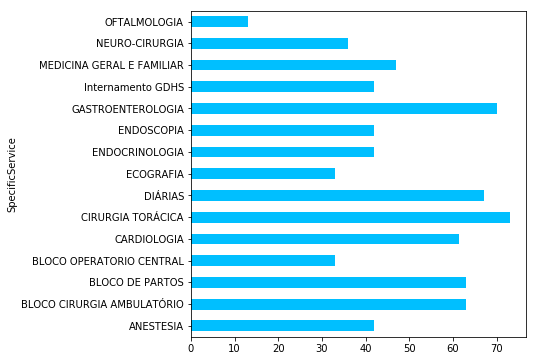

In [90]:
Service_by_Age.head(15).plot.barh(color="deepskyblue");

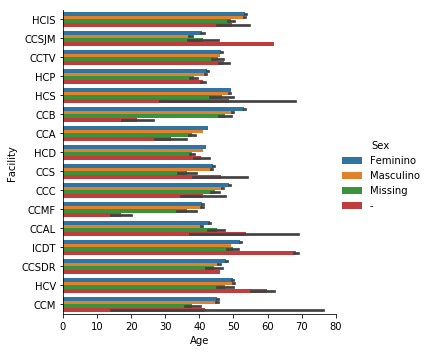

In [20]:
sns.catplot(x="Age", y="Facility", hue="Sex", kind="bar", data=data);

### Barplots with count of a categorical variable

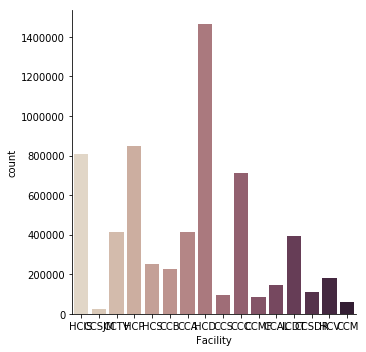

In [21]:
sns.catplot(x="Facility", kind="count", palette="ch:.25", data=data);

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

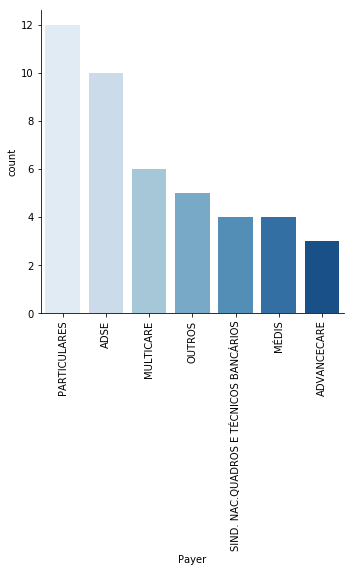

In [25]:
sns.catplot(x="Payer", kind="count", palette="Blues", data=data);
plt.xticks(rotation=90)

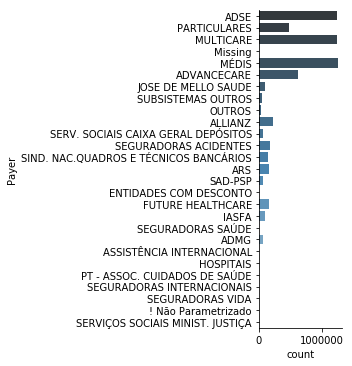

In [22]:
sns.catplot(y="Payer", kind="count", palette="Blues_d", data=data);

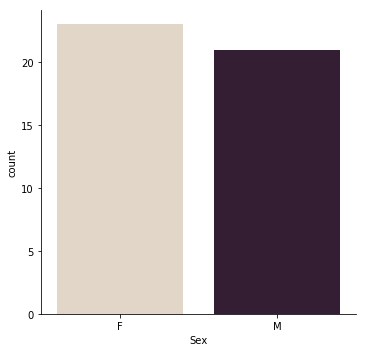

In [33]:
sns.catplot(x="Sex", kind="count", data=data);
sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))

## Pie Charts

In [69]:
data.Age.head(10)

0    58
1    58
2    58
3    58
4    48
5    48
6    41
7    51
8    73
9    73
Name: Age, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc17cf39c18>],
      dtype=object)

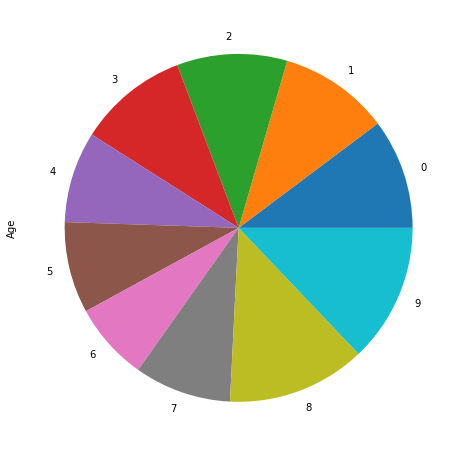

In [26]:
data.Age.head(10).plot(kind='pie', subplots=True, figsize=(8, 8))

In [74]:
# Commented out due to error code 

#data_f = data["Facility"]
#data_f.plot(kind='pie', figsize=(8, 8))

ValueError: could not convert string to float: 'PARTICULARES'

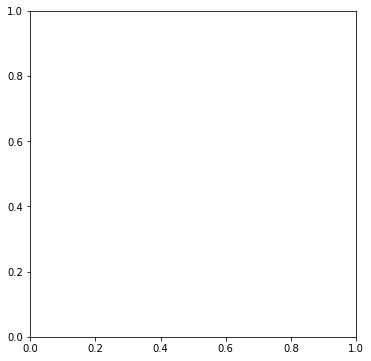

In [35]:
# Create a pie chart
plt.pie(
    # using data total)arrests
    data['Payer'],
    # with the labels being officer names
    labels=data['Payer'],
    # with no shadows
    shadow=False,
    # with one slide exploded out
    explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

## Heatmaps

In [24]:
def pivot_count(df, rows, columns):
    df_pivot = df.pivot_table(values="UniqueID",
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [25]:
def heatmap_count(df, col1, col2):
    pivot_table = pivot_count(df,col1, col2)
    sns.heatmap(pivot_table, annot=True, fmt='g')
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.show()

In [26]:
# IMPORTANT : With large dataset, make sure to remove columns with a high cardinality
# Ideally have type for all of these 
interact(heatmap_count, col1=data.columns.drop(["UniqueID", "Age", "SpecificService"]),
                                 col2=data.columns.drop(["UniqueID", "Age", "SpecificService"]),
                                 df=fixed(data));

interactive(children=(Dropdown(description='col1', options=('Date', 'Facility', 'Payer', 'CategoryofService', …

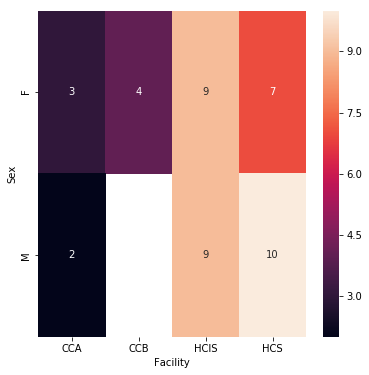

In [75]:
heatmap_count(data, "Sex","Facility")